<a href="https://colab.research.google.com/github/ZacharyKahn16/Coding-for-engineers-and-business/blob/master/Coding_For_Engineers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding For Engineers

Coding, it is a wonderful thing. In engineering we are taught how to solve problems, however most problems nowadays require a computer to be able to solve them **quickly and at scale**. This is where coding comes into play. While there are lots of things that could be considered, I have tried to condense it down into the areas I see as *most relevent for engineers*.

Specifically, I have made this based on my own experience which is Computer Science and Chemical Engineering. The skills presented here are useful for anyone looking to:
- **Automate** their work
- Perform **numerical analysis** (like integration or differentiation)
- Do **data analysis** (and from there some machine learning or other neat stuff)

I also briefly mention what the cloud is and why it might be useful to start looking in to it with your company (hint: you are going to need it if you want to work with a lot of data).

This is **not** a full course or tutorial, I am merely trying to show you the basics and will point you to the best resources I know and have used. Also, I am planning to make a course that goes into detail and larger examples about everything mentioned here. If you are interested in it, **please let me know** as I am always eager to find out if I am building something people actually want. You can [contact me](https://ca.linkedin.com/in/zachary-kahn) through LinkedIn.

### Blurb about me
Feel free to skip this, just wanted to give you a bit of background on me in case you are wondering why should listen to anything I say.

My name is Zachary Kahn and I am the co-founder of [Compound Confidence](https://compoundconfidence.com/). I have a passion for helping people learn the skills and strategies that allow them to achieve anything they want while doing what they love. I interned at **Google** twice, and am starting there full time as a Software Engineer later this year. I graduated from university with a combined degree in Chemical Engineering and Computer Science and now focus on building great education and technology products.

## Programming languages you will need
Again, **don't be overwhelmed by the following list**. You will build up this knowledge over time. You don't need to master each one before moving onto the next one. Basically, learn the minimum amount needed to do whatever you need to, then start the next one. Building software to solve a real life problem is where you learn the most. Things will come together as you begin building, experimenting, getting frustrated, make break throughs, and repeat the whole process.

Programming languages useful to engineers
1. Python (most versatile in my opinion)
2. SQL (good for manipulating large datasets)
3. Bash (good for automating some things)

## Assumptions
As engineers, am I assuming you have taken at least one programming course where you learned the basic programming constructs. These include:
- loops
- if statements
- variables
- objects
- functions
- arrays/lists
- hopefully some other good stuff that rings a bell...

There a few other useful features to know about, and I will be showing the Python notation for them next. Python is the language we will be using in this tutorial, but I will mention a few others. This tutorial is actually all being done through a [Jupyter Notebook](https://jupyter.org/).

## Time to dive in
Alright, with all that covered let's get into the material!

First, we will cover same *very* basic syntax for Python. For SQL and Bash I will give some resources at the end of the notebook.

Then we will dive into a few examples that show how you can use these languages for:
- Automation
- Numerical analysis
- Data analysis and modelling

### Python Syntax basics

In [1]:
## List
myrange = range(10,20) # creates list from [10..19]
print(myrange)

range(10, 20)


In [2]:
## Loops

# For Loop
print('For Loop')
for ele in myrange:
    print(ele)

# While Loop
print('While Loop')
range_len = len(myrange) # number of elements in myrange list
i = 0
while i < range_len:
    print(myrange[i])
    i += 1

For Loop
10
11
12
13
14
15
16
17
18
19
While Loop
10
11
12
13
14
15
16
17
18
19


In [4]:
# If, else, elif statements

# Given a number as an output, let's treat it differently depending on the value.
my_input = input('What is your favorite number?')

# Convert from string to int
my_input = int(my_input)

if my_input < 10:
    print('Small fav number')
elif my_input < 100:
    print('Medium fav number')
else:
    print('Large fav number')

What is your favorite number?5
Small fav number


In [5]:
# Functions
# This is nice for cleaning things up into nice chunks of code we can reuse.

# Simple example, but hopefully illustrates the point and syntax.

#               arguments to function go in between the brackets, and you can have 0 or more of them!
def sum_of_list(my_list): 
    return sum(my_list)

print(sum_of_list(range(10)))

45


Hopefully that is enough to get you started, at the end of this notebook you can find a list of resources if you want to learn more about Python programming.

## Automation 
There are various repeatable tasks engineers would love to be able to automate in their job. From my experience, these are some of the following:
- updating spreadsheets
- piping output of one spreadsheet into another
- changing the value of a row or column slighly without having to manually change each entry
- iterative simple calculations
- generating a list that has some intial values useful for further calculations

Let's see how a bit of code can help with some these issues.

### Upating Spreadsheets
Often you can use a macro for this, but depending on the task coding can help as well. Let's look at a scenario.

#### Scenario
Your spreadsheet has a list of events, each with a cost code, and a remaining budget (per cost code). You want to add expenses (reduce remaining budget) to multiple cost code codes, and you only want an update to happen if the cost is less than the remaining budget.

You could go through manually and do this, but it could be tedious if you have tons of events and cost codes. Let's automate it! Later I'll show you how to read in a spreadsheet, but for now, I'll make one.

To do this we'll need [pandas](https://pandas.pydata.org/docs/), a data analysis package. They have a nice way to import csvs, which is why I'm choosing to use it.

In [0]:
# import the package
import pandas as pd
import numpy as np

In [5]:
# Generate spreadsheet, we will cover how to read in a spreadsheet later
budgets = pd.DataFrame(data={'event': [1,2,3,4,5], 'cost_code': [1,2,1,3,2], 'remaining_budget':[5,10,5,8,10]})
budgets.head()

,event,cost_code,remaining_budget
0,1,1,5
1,2,2,10
2,3,1,5
3,4,3,8
4,5,2,10


In [0]:
def update_budget(budget_sheet, withdraw_from_cost_code):
  ''' Update the each cost code in budget sheet
  
    Args:
      budget_sheet: Dataframe that represents budget spreadsheet.
      withdraw_from_cost_code: dictionary, where key is cost code, value is
        amount to subtract from cost code.
    
    Returns:
      Updated budget if all costs valid (not higher than remaining budget),
      otherwise returns original budget.
  '''

  # Create completely new copy of spreadsheet (this is ok assuming spreadsheet
  # is not too large, like < 50 Mb).
  updated_budget = budget_sheet.copy()

  # Go through each item in dictionary, and make sure the cost does not
  # exceed the remaining budget for the specific cost code.
  for cost_code, new_cost in withdraw_from_cost_code.items():
    # Filter out the data of interest
    cost_code_filter = budget_sheet['cost_code'] == cost_code # return column that contains 
                                                              # True where this expression is True
                                                              # False otherwise.
    remaining_budget_filter = budget_sheet['remaining_budget'] >= new_cost # same thing here

    # Get a subsetted version of the budget sheet.
    tmp_budget = budget_sheet.where(cost_code_filter).dropna()

    # For current cost code check all events have enough money.
    if tmp_budget.shape[0] > 0: # Make sure cost code exists in spread sheet
      orig_rows = tmp_budget.shape[0]
      after_filter_rows = tmp_budget.where(remaining_budget_filter).dropna().shape[0]
      if orig_rows != after_filter_rows:
        print('The cost of {} for cost code {} exceeds remaining budget of at least one event.'.format(new_cost, cost_code))
        print('Returning original budget')
        return budget_sheet
      
      # Update the remaining budget
      updated_budget['remaining_budget'] = np.where(
          cost_code_filter & remaining_budget_filter, # When this condition is true
          updated_budget['remaining_budget'] - new_cost, # Subtract new cost from remaining budget
          updated_budget['remaining_budget']) # If condition is False, return original value

    else: # Inputted non-existent cost cost
      print('Cost code {} does not exist in budget.'.format(cost_code))
      print('Returning original budget')
      return budget_sheet

  return updated_budget


In [9]:
updated_budget = update_budget(budgets, {1: 2, 2: 8})
updated_budget.head()

,event,cost_code,remaining_budget
0,1,1,3
1,2,2,2
2,3,1,3
3,4,3,8
4,5,2,2


Now you can write this final spreadsheet to a csv and you have successfully updated all the budgets!

In [0]:
updated_budget.to_csv('updated_budgets.csv')

In [15]:
ord('A')

65

## Updating long list of column names
For this example, suppose you have a spreadsheet and you need to change all the column names by added an _v1 to them. If you have let's say, 100 columns, this might feel tedious to do manually. Let's see how some code could automate it.

In [12]:
# Original columns
my_data = {}
# For example, we'll have columns name A, B, ... , Z
for i in range(26):
  my_data[chr(65 + i)] = ['hello', i]

# Turn this into spreadsheet like format
data = pd.DataFrame(my_data)
data.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z
0,hello,hello,hello,hello,hello,hello,hello,hello,hello,hello,hello,hello,hello,hello,hello,hello,hello,hello,hello,hello,hello,hello,hello,hello,hello,hello
1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25


In [13]:
# Now let's change the columns to have _v1 appended
cols = data.columns
# Dictionary that maps old names to new names
new_cols = {}
for col in cols:
  new_cols[col] = col + '_v1'

print('New column mapping:')
print(new_cols)
print('')
print('Updated column names:')
data.rename(columns=new_cols, inplace=True)

data.head()

New column mapping:
{'A': 'A_v1', 'B': 'B_v1', 'C': 'C_v1', 'D': 'D_v1', 'E': 'E_v1', 'F': 'F_v1', 'G': 'G_v1', 'H': 'H_v1', 'I': 'I_v1', 'J': 'J_v1', 'K': 'K_v1', 'L': 'L_v1', 'M': 'M_v1', 'N': 'N_v1', 'O': 'O_v1', 'P': 'P_v1', 'Q': 'Q_v1', 'R': 'R_v1', 'S': 'S_v1', 'T': 'T_v1', 'U': 'U_v1', 'V': 'V_v1', 'W': 'W_v1', 'X': 'X_v1', 'Y': 'Y_v1', 'Z': 'Z_v1'}

Updated column names:


,A_v1,B_v1,C_v1,D_v1,E_v1,F_v1,G_v1,H_v1,I_v1,J_v1,K_v1,L_v1,M_v1,N_v1,O_v1,P_v1,Q_v1,R_v1,S_v1,T_v1,U_v1,V_v1,W_v1,X_v1,Y_v1,Z_v1
0,hello,hello,hello,hello,hello,hello,hello,hello,hello,hello,hello,hello,hello,hello,hello,hello,hello,hello,hello,hello,hello,hello,hello,hello,hello,hello
1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25


Alright, so that sums up two examples of how you can use Python to automate some tasks. There are plenty of other possibilites and I encourage you to check try them out for yourself!

# Numerical Analysis
Numerical analysis is a really powerful tool and something engineers often need to perform. While doing 'back of the envelope' calculations can be a good start, you can often perform much better analysis using numerical analysis. There are many tools and packages available that can made things really simple (compared to doing it by hand).

In this section, we will show an example of how to:
- Integrate a function
- Find the minimum of a function

We will use [scipy](https://www.scipy.org/) to do this.

In [14]:
# Integrate a function
from scipy import integrate

def func_to_integrate(x):
  return x**2 + 5


print(integrate.quad(func_to_integrate, 0 , 5))

(66.66666666666669, 7.401486830834379e-13)


In [15]:
# Find minimum of function
from scipy.optimize import minimize_scalar
result = minimize_scalar(func_to_integrate)

print(result.x)

1.147310308261937e-08


That covers a very basic introduction to some of the numerical analysis you can do with scipy. You can even solve ODEs and other more complex functions. Definitely check out the documentation because you will be amazed with what you can solve!

# Data Analysis and Modelling

This is arguably one of the most useful parts of Python for someone in engineering or business. Being able to analyze data and build models is a very useful skill. Entire courses are dedicated to this topic, so my goal is to show you:
- How to import data from a spreadsheet
- How quickly you can build certain models
- How you can use these models to make predictions

We are going to use **Tensorflow to build a simple 4 layer neural network** to try and estimate the value of a house based on various input features. Neural networks are proving to be quite good at analyzing large amounts of data. If you want to get more serious about deep learning there are lots of resources, but I recommend checking out the [Deep Learning Specialization](https://www.coursera.org/specializations/deep-learning).

In [0]:
# Import all modules needed
from sklearn import preprocessing
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np
import pandas as pd

In [13]:
# Import data from spreadsheet
# We'll use pandas again here
training_data = pd.read_csv('/content/sample_data/california_housing_train.csv')
training_data.head() 
test_data = pd.read_csv('/content/sample_data/california_housing_test.csv')
test_data.head() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [0]:
def getXandY(df):
  x = df.iloc[:,:-1]
  y = df.iloc[:,-1:]
  return (x, y)

In [0]:
# Split into x (input features) and y (output result)
x_train, y_train = getXandY(training_data)
x_test, y_test = getXandY(test_data)

In [6]:
# x_train.head()
# y_train.head()
# x_test.head()
y_test.head()

,median_house_value
0,344700.0
1,176500.0
2,270500.0
3,330000.0
4,81700.0


In [0]:
# Build Neural Net Architecture
inputs = keras.Input(shape=(x_train.shape[1],), name='inputs')
x = layers.Dense(32, activation='relu', name='hl-1')(inputs)
x = layers.Dense(32, activation='relu', name='hl-2')(x)
x = layers.Dense(32, activation='relu', name='hl-3')(x)
output = layers.Dense(1, name='output')(x)

model = keras.Model(inputs=inputs, outputs=output, name='house-price-pred-model')



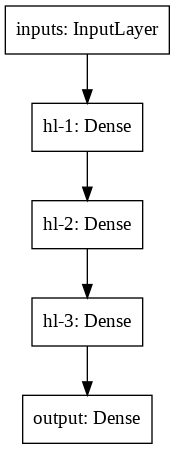

In [8]:
# Print out model architecture
keras.utils.plot_model(model, 'house_price_model.png')

In [0]:
# Build and train model
model.compile(optimizer='adam',
              loss = 'mse',
              metrics= [keras.metrics.MeanSquaredError(),
                        keras.metrics.MeanAbsolutePercentageError()])

In [10]:
print('# Fit model on training data')
history = model.fit(x=x_train, y=y_train, batch_size= 64, epochs= 150)
# print('history dict:', history.history)

# Fit model on training data
Epoch 1/150
266/266 [==============================] - 0s 2ms/step - loss: 38094360576.0000 - mean_squared_error: 38094360576.0000 - mean_absolute_percentage_error: 71.6942
Epoch 2/150
266/266 [==============================] - 0s 2ms/step - loss: 26053447680.0000 - mean_squared_error: 26053447680.0000 - mean_absolute_percentage_error: 55.8342
Epoch 3/150
266/266 [==============================] - 0s 1ms/step - loss: 23187920896.0000 - mean_squared_error: 23187920896.0000 - mean_absolute_percentage_error: 53.7176
Epoch 4/150
266/266 [==============================] - 0s 2ms/step - loss: 17648775168.0000 - mean_squared_error: 17648775168.0000 - mean_absolute_percentage_error: 51.4268
Epoch 5/150
266/266 [==============================] - 0s 2ms/step - loss: 12199416832.0000 - mean_squared_error: 12199416832.0000 - mean_absolute_percentage_error: 54.5220
Epoch 6/150
266/266 [==============================] - 0s 1ms/step - loss: 11164520448.0000 - mean_squared

In [11]:
# Evaluate the model
print('Evaluate on test data')
results = model.evaluate(x_test, y_test)
print('test loss, test acc:', results)

Evaluate on test data
94/94 [==============================] - 0s 1ms/step - loss: 4484918272.0000 - mean_squared_error: 4484918272.0000 - mean_absolute_percentage_error: 29.9338
test loss, test acc: [4484918272.0, 4484918272.0, 29.9338436126709]


In [12]:
# Make predictions
print('Generate predictions for 3 samples')
predictions = model.predict(x_test[:3])
print(predictions)
# Actual results
print("Actual results")
y_test.head(3)


Generate predictions for 3 samples
[[362961.6 ]
 [210939.86]
 [290407.94]]
Actual results


,median_house_value
0,344700.0
1,176500.0
2,270500.0


In [20]:
# Make prediction on entire test set and see accuracy
predictions = model.predict(x_test)

accuracy = 1- np.mean((np.absolute(y_test - predictions)/y_test))
print('Model accuracy = {}%'.format(accuracy[0]*100))

Model accuracy = 70.06615078694185%


Awesome! We were able to build a model that can predict the median housing price based on a variety of input features with an accuracy of about 70%.

With further tuning, this result could probably be improved, but that's beyound what I would like to cover here.

Hopefully, this shows you how easy it is to build models with code. You can also build simple regression models, like logistic regression or multilinear regression, using code. I encourage you to look up how this can be done.


## Import note about modelling and data analysis

Understanding the basic of how the models you build work is **crucial**. While it is only a few lines of code to build a neural net or a regression model, there is **a ton** of stuff happening under the hood. I strongly recommend learning more about the underlying math for the models you which to build because it will help you evaluate, tune, and make your models, as well as understand its limitations.

## The Cloud
Many people might here the word 'The Cloud' whenever they hear the word 'Big Data' or 'Machine Learning'. The reason for this is that to process large datasets, you will need more than one computer. This is because:
- Massive amounts of data can't fit in one computer
- The processing power of one computer isn't enough to process all of your data

The Cloud can help you solve these two problems.

Using the cloud let's you write code or store data that appears to the user as if it's at your figure tips, but really the data can be stored in multiple computers all over the world. Pretty neat!

If you want to get serious about data analysis and modelling, you will start to see the benefits the cloud provides. Hope that this examples was able to 'bring you above the clouds' and make things clearer...sorry couldn't help myself.

# Conclusion
Thanks so much for joining this session! In it you have learned about some of the most important areas that code can help you in as an engineer or business person. The three main areas are:
- Automation
- Numerical analysis
- Data analysis and modelling

I hope you found the examples useful and are excited to start exploring all the ways code might help you do your work in a different, more efficient, more scalable, and more enjoyable way. 

## Recommended Resources
As promised here are some resources you can check out to learn more.

If you think everything covered here in an of itself could be a cool course that you would take, please [let me know](https://ca.linkedin.com/in/zachary-kahn)!

However, in the mean time I want to provide some courses and resources I've used that I have really enjoyed.

Python
- [Complete Python Bootcamp](https://www.udemy.com/course/complete-python-bootcamp/)
- [Free Python Courses](https://medium.com/swlh/5-free-python-courses-for-beginners-to-learn-online-e1ca90687caf)
- [Python Crash Course](https://cs231n.github.io/python-numpy-tutorial/)

SQL
- [Complete SQL Bootcamp](https://www.udemy.com/course/the-complete-sql-bootcamp/)
- [PostgreSQL Tutorials](https://www.postgresqltutorial.com/)

Machine Learning and Data Analysis
- [Machine Learning A-Z](https://www.udemy.com/course/machinelearning/)
- [Deep Learning Specialization](https://www.coursera.org/specializations/deep-learning)
- [Pandas Tutorials](https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html)
- [Numpy Tutorials](https://numpy.org/devdocs/user/quickstart.html)